<a href="https://colab.research.google.com/github/minjcop/AI-ML-DL/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류(Classification)

* data(a set of object)가 주어졌을 때, object를 정해진 것들 중 하나로 분류(Classification)
* object가 가지는 속성은 attributes(feature)라고 함.
* 이런 속성 값을 어떻게 분류하느냐에 따라서 결과가 달라질 수 있다.(class of label)
* 주어진 것만 가지면 결과는 항상 같다.(보통 데이터는 label이 정해져 있지만 이런 점에서도 생각해봐야 한다. 특히, 적용시킬 시에는)


- supervised : 0 or 1. 
- semi-supervised : 0으로만 학습 시키거나, 1로만 학습시킨다. 1로만 시킨다고 가정하면, 0에 대한 데이터는 학습이 제대로 이루어지지 않을 수도 있다.

+) cross-validation.

ML 은 2가지 단계를 거침
1. Model 생성(Learning / Training) -> Training Set
2. 생성된 Model 을 Test 하는 과정(Evaluation) -> Test Set

Train -> Test에 적용하지 않도록 해야 한다. 

Feature extraction.
- feature 중에서도 중요한 것이 있고, 중요하지 않은 것이 있다.

**ML**에서는
- Input -> Feature -> ML -> Output

*Feature 단계에서 어려움을 많이 겪는데 그 이유는 Domain 지식이 부족해서 어떤 것이 중요하고 덜 중요한지 파악하기가 쉽지 않기 때문이다.*

**DL**에서는
대부분의 feature 를 알아서 처리해주기 때문에 대부분은 Deep Learning Engine 이 Machine Learning Engine 보다 성능이 좋다.


* KNN (K - Nearest Neighbor)
* Decision Tree


K를 많이 쓰는데 이 값은 그냥 변수라고 생각하면 된다.

**KNN(K-Nearest Neighbor)**: 데이터를 거리가 가까운 K개의 데이터를 참고하여 데이터를 분류하는 방법.
- 데이터 간의 거리를 측정하기 위해 Euclidian Distance를 사용,
- K값에 따른 성능 차이 존재

In [25]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [4]:
import os
import tarfile
from six.moves import urllib
import pandas as pd
from time import time

In [5]:
 cd '/content/gdrive/My Drive/Colab Notebooks'

/content/gdrive/My Drive/Colab Notebooks


In [6]:
cd '공학연구실습(최윤호)'

/content/gdrive/My Drive/Colab Notebooks/공학연구실습(최윤호)


In [7]:
pwd # 이렇게 현재 위치 파악 가능

'/content/gdrive/My Drive/Colab Notebooks/공학연구실습(최윤호)'

In [8]:
col_names = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
"land", "wrong_fragment", "urgent", "hot",
"num_failed_logins", "logged_in", "num_compromised", "root_shell",
"su_attempted", "num_root", "num_file_creations",
"num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
"is_guest_login", "count", "srv_count",
"serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
"same_srv_rate", "diff_srv_rate",
"srv_diff_host_rate", "dst_host_count","dst_host_srv_count",
"dst_host_same_srv_rate", "dst_host_diff_srv_rate",
"dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
"dst_host_serror_rate", "dst_host_srv_serror_rate",
"dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

In [9]:
kdd_data = pd.read_csv('kddcup_data_10_percent_corrected.csv', names = col_names)

In [10]:
kdd_data_10percent = kdd_data
kdd_data_10percent.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [11]:
kdd_data_10percent.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [12]:
kdd_data_10percent['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [13]:
print(kdd_data_10percent.dtypes)

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [14]:
kdd_data_10percent['protocol_type'], protocols = pd.factorize(kdd_data_10percent['protocol_type'])
kdd_data_10percent['service'], services = pd.factorize(kdd_data_10percent['service'])
kdd_data_10percent['flag'], flags = pd.factorize(kdd_data_10percent['flag'])
kdd_data_10percent['label'], attacks = pd.factorize(kdd_data_10percent['label'])
print(kdd_data_10percent.dtypes)

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [15]:
from sklearn.model_selection import train_test_split
# 기존에 정의했던 col_names를 사용하여 label과 features를 분리
X = kdd_data_10percent[col_names[:len(col_names)-1]]
Y = kdd_data_10percent['label'].copy()
# Train set과 Test set을 8:2 비율로 분리 0 ~ 9를 분류하는데 0, 1 만 들어가면 안되니까 이를 방지 위해 random
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [16]:
 # Train set label 조회
Y_train.value_counts()

5     224801
4      85640
0      77708
13      1765
15      1279
10      1039
20       827
9        819
8        788
7        217
17       183
6         44
1         26
19        19
11        18
14        10
22         8
2          7
12         6
18         6
21         2
16         2
3          2
Name: label, dtype: int64

In [17]:
# Test set label 조회
Y_test.value_counts()

5     55989
4     21561
0     19570
13      438
15      310
9       221
10      208
20      193
8       191
17       48
7        47
6         9
1         4
11        3
14        2
16        2
12        2
2         2
22        2
18        1
19        1
3         1
Name: label, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
t0 = time()
clf.fit(X_train, Y_train)
tt = time() - t0
print ("Classifier trained in {} seconds.".format(round(tt, 3)))

In [ ]:
print ("Training Score:", clf.score(X_train, Y_train))
print ("Test_Score: ", clf.score(X_test, Y_test))

### 의사 결정 트리

새를 분류한다고 하면 
- 날 수 있는지 -> 네 아니오.
- 지느러미가 있는지 -> 네 아니오 ....
...

이런 식으로 나아가 label을 판단한다.

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=156)
trained_model = clf.fit(X_train, Y_train)
print ("Training Score:", trained_model.score(X_train, Y_train))
print ("Test_Score: ", trained_model.score(X_test, Y_test))

Training Score: 0.9999949394761346
Test_Score:  0.9996457669146298


In [26]:
ls

'공학연구실습 3주차'                kddcup_data_10_percent_corrected.csv
'Colab 경로 설정 예시'              kddcup.ipynb
'부동산 EDA 및 간단한 처리.ipynb'   mnist-original.mat


In [28]:
from sklearn.datasets import fetch_openml
try:
  mnist = fetch_openml('MNIST original')
except Exception as ex:
  from six.moves import urllib
  from scipy.io import loadmat
  import os
  mnist_path = os.path.join(".", "mnist-original.mat")
  # download dataset from github.
  mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
  response = urllib.request.urlopen(mnist_alternative_url)
  with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
  mnist_raw = loadmat(mnist_path)
  mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
  }


/usr/local/lib/python3.6/dist-packages/sklearn/datasets/_openml.py:55: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


In [29]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [33]:
X, y = mnist['data'], mnist['target']
X.shape # 28 * 28 = 784 자주 나오는 단위.

(70000, 784)

In [34]:
y.shape # python 0부터 10까지의 데이터 일때는 뒤에 아무것도 안나옴

(70000,)

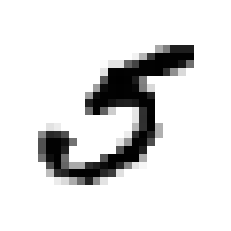

In [35]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis('off')
plt.show()

In [36]:
y[36000]

5.0

In [38]:
# 훈련 데이터와 테스트 데이터를 나누기 위한 코드
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 데이터 셔플링
shuffle_index = np.random.permutation(60000) 
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

###### 숫자 5만을 식별하는 감지기

In [39]:
# 5는 True고, 다른 숫자는 모두 False
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [40]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5) # X_train 값에서 y_train_5 만 학습이 되도록.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
sgd_clf.predict([some_digit])

array([ True])

* K fold cross validation 적용

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95945, 0.951  , 0.96065])

* 5가 아닌 것으로 분류하는 더미 분류기

In [44]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9092 , 0.90725, 0.9125 ])

* Confusion Matrix (오차 행렬)

결과는 

[TN, TP

FN, TP]

FN <- TP 일수록 재현율(Recall) 높아지고

TP -> FP 일수록 정밀도(Precision) 높아진다

In [45]:
# 예측값 생성 코드
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
# 오차 행렬 생성 코드
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53529,  1050],
       [ 1528,  3893]])

In [47]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

#### 정밀도(Precision)
- TP / TP + FP (TP : 진짜 양성의 수, FP : 거짓 양성의 수)
- 분류기가 정확하게 감지한 양성 예측의 정확도

#### 재현율(Recall)
- TP / TP + FN (FN : 가짜 음성의 수)
- 분류기가 정확하게 감지한 양성 샘플의 비율

In [50]:
from sklearn.metrics import precision_score, recall_score
# 정밀도 계산 함수
precision_score(y_train_5, y_train_pred)

0.7875783936880437

In [51]:
# 재현율 계산 함수
recall_score(y_train_5, y_train_pred)

0.718133185759085

#### F1 Score
- 정밀도와 재현율의 조화 비율

In [53]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)


0.751254341952914

In [58]:
y_scores = sgd_clf.decision_function([some_digit]) 
y_scores # 강하게 예측할 수록 값이 크게 나옴 양수면 강하게 예측, 음수면 약하게 예측 이렇게 일단 보면 됨.

array([408.53091477])

In [55]:
threshold = 0 # 기준. 방지턱.
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [57]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

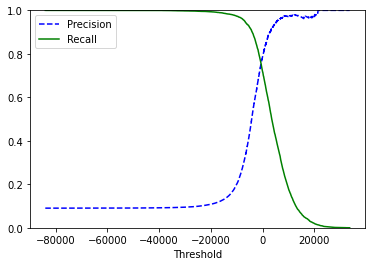

In [59]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve

# 가능한 모든 임곗값에 대해 정밀도와 재현율을 계산하는 코드
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# 정밀도와 재현율 그래프 생성 함수
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
  plt.xlabel("Threshold")
  plt.legend(loc="upper left")
  plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

precision과 recall 이 어느 정도 반비례하는 것을 확인할 수 있다.
- 정확도 vs 재현율. 어느 것이 중요한 지를 고려하여 모델에 적용시킬 수 있다.



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


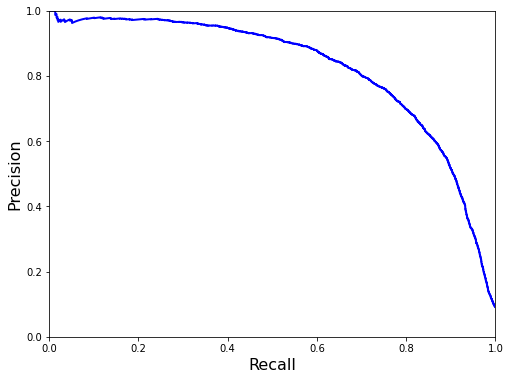

In [63]:
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_5, y_train_pred_90)
recall_score(y_train_5, y_train_pred_90)
#정밀도와 재현율
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, "b-", linewidth=2)
  plt.xlabel("Recall", fontsize=16)
  plt.ylabel("Precision", fontsize=16)
  plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [64]:
#훈련 세트에 대한 예측 만들기
y_train_pred_90 = (y_scores > 70000)

# 임계값이 70,000 이상에서의 정밀도 코드
precision_score(y_train_5, y_train_pred_90)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0